# Import the Libraries

In [51]:
import tensorflow as tf
from tensorflow import keras
tf.keras.Model()
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# Import the dataset

mnist = keras.datasets.mnist

In [53]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [54]:
# normalize the data : 0.255 -> 0.1
x_train, x_test = x_train / 255.0, x_test / 255.0

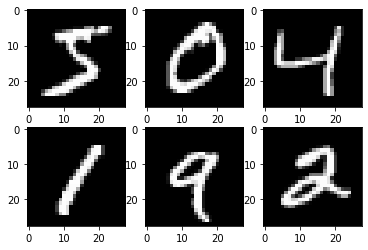

In [55]:
# Plot the data

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
plt.show()

In [56]:
# model

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Flattens our image to reduce to 1-D
    keras.layers.Dense(128, activation = 'relu'), # Fully connected layer
    keras.layers.Dense(10), # Final layer
])

In [57]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [59]:
# We can write in this from also

'''model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(10))
print(model.summary())'''

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [60]:
# Loss & optimizer

loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True) # For multiclass problem because y is an int class level also sometimes label include onehot
optim = keras.optimizers.Adam(lr=0.001) # create optimizer lr is the hyper parameter
metrics = ["accuracy"]

In [61]:
model.compile(loss=loss, optimizer=optim, metrics=metrics) # configure the model for training

In [62]:
# training

batch_size = 64
epochs = 5
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=2)

Epoch 1/5
938/938 - 2s - loss: 0.2983 - accuracy: 0.9160
Epoch 2/5
938/938 - 2s - loss: 0.1351 - accuracy: 0.9604
Epoch 3/5
938/938 - 2s - loss: 0.0938 - accuracy: 0.9721
Epoch 4/5
938/938 - 1s - loss: 0.0705 - accuracy: 0.9796
Epoch 5/5
938/938 - 2s - loss: 0.0552 - accuracy: 0.9830


In [63]:
# evaluate the model

model.evaluate(x_test, y_test, batch_size=batch_size, verbose=2)

157/157 - 0s - loss: 0.0712 - accuracy: 0.9781


[0.07119757682085037, 0.9781000018119812]

In [64]:
# predictions

probability_model = keras.models.Sequential([
    model,
    keras.layers.Softmax()
])

In [65]:
predictions = probability_model(x_test)
pred0 = predictions[0]
print(pred0)
label0 = np.argmax(pred0)
print(label0)

tf.Tensor(
[2.60980119e-06 2.89361441e-08 1.16346018e-04 1.54946378e-04
 2.56354005e-09 3.69562315e-07 1.03310374e-10 9.99674797e-01
 2.01910079e-05 3.07564442e-05], shape=(10,), dtype=float32)
7


In [66]:
# 2nd way
# model + softmax

predictions = model(x_test)
predictions = tf.nn.softmax(predictions)
pred0 = predictions[0]
print(pred0)
label0 = np.argmax(pred0)
print(label0)

tf.Tensor(
[2.60980119e-06 2.89361441e-08 1.16346018e-04 1.54946378e-04
 2.56354005e-09 3.69562315e-07 1.03310374e-10 9.99674797e-01
 2.01910079e-05 3.07564442e-05], shape=(10,), dtype=float32)
7


In [67]:
# 3rd way

predictions = model.predict(x_test, batch_size=batch_size)
predictions = tf.nn.softmax(predictions)
pred0 = predictions[0]
print(pred0)
label0 = np.argmax(pred0)
print(label0)

tf.Tensor(
[2.6098037e-06 2.8936199e-08 1.1634624e-04 1.5494652e-04 2.5635452e-09
 3.6956300e-07 1.0331077e-10 9.9967480e-01 2.0191064e-05 3.0756473e-05], shape=(10,), dtype=float32)
7


In [68]:
# For 5 different labels

pred05s = predictions[0:5]
print(pred05s.shape)
label05s = np.argmax(pred05s, axis = 1)
print(label05s)

(5, 10)
[7 2 1 0 4]


# Or we can do in another way

In [69]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [70]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [71]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [72]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4830 - accuracy: 0.8608
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1517 - accuracy: 0.9555
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1083 - accuracy: 0.9684
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0881 - accuracy: 0.9724
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0760 - accuracy: 0.9764


[0.07604418694972992, 0.9764000177383423]